In [2]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'keras.wrappers'

In [80]:
close = data.loc[:,'Adj Close']
close.head

<bound method NDFrame.head of 0         2.499133
1         2.697639
2         2.724787
3         2.611960
4         2.640104
           ...    
4944    160.789993
4945    159.190002
4946    156.330002
4947    156.000000
4948    156.880005
Name: Adj Close, Length: 4949, dtype: float64>

In [81]:
close_norm = close/max(close)
close_norm

0       0.015543
1       0.016777
2       0.016946
3       0.016245
4       0.016420
          ...   
4944    1.000000
4945    0.990049
4946    0.972262
4947    0.970210
4948    0.975683
Name: Adj Close, Length: 4949, dtype: float64

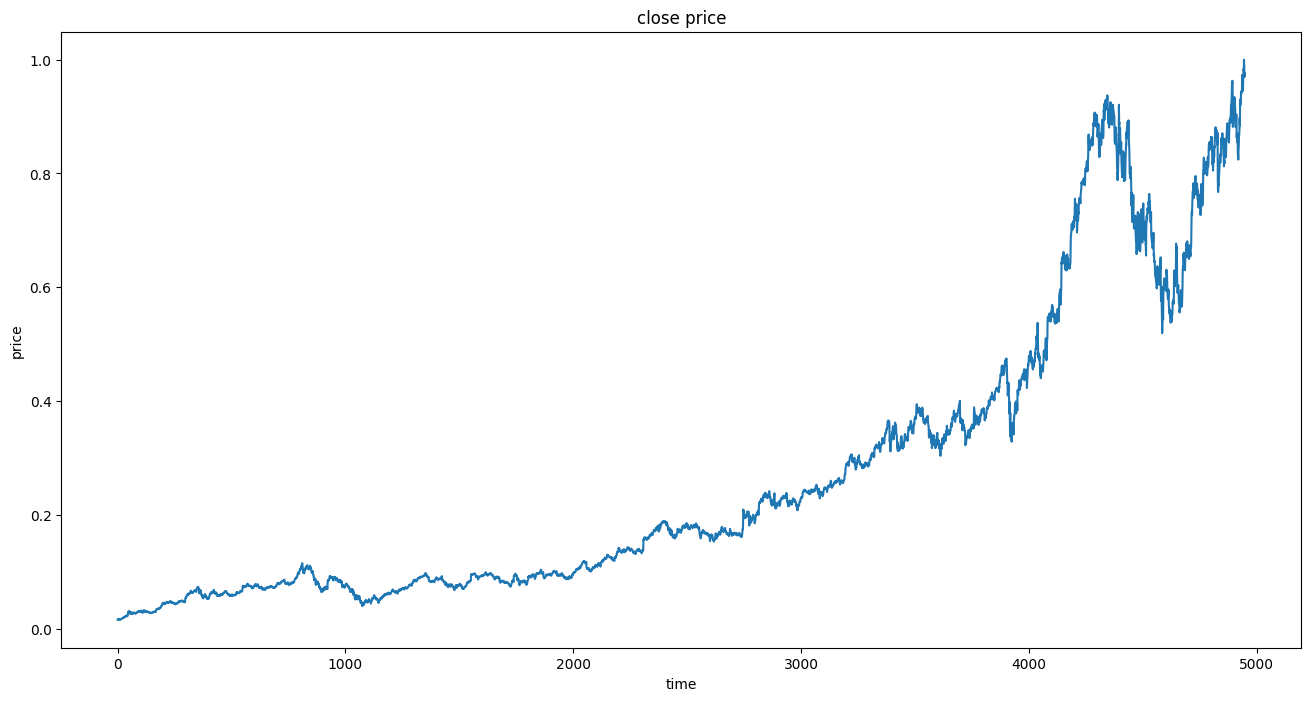

In [82]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(close_norm)
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [83]:
def extract_data(data,time_step):
    x, y = [], []
    for i in range(len(data)-time_step):
        x.append([a for a in data[i:i+time_step]])
        y.append(data[i+time_step])
    x = np.array(x)
    x = x.reshape(x.shape[0],x.shape[1],1)
    y = np.array(y)
    return x, y

In [84]:
time_step = 30
x,y = extract_data(close_norm, time_step)
print(x.shape,len(y))

(4919, 30, 1) 4919


In [96]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
model_RNN = Sequential()
model_RNN.add(SimpleRNN(units=5, input_shape=(time_step,1),activation='relu'))
model_RNN.add(Dense(units=1, activation='linear'))
model_RNN.compile(optimizer='adam',loss='mean_squared_error')
model_RNN.summary()

D:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 5)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [97]:
model_RNN.fit(x,y,batch_size=32,epochs=50)

Epoch 1/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0943
Epoch 2/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0351
Epoch 3/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0203
Epoch 4/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058
Epoch 5/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3016e-04
Epoch 6/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2200e-05
Epoch 7/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0494e-05
Epoch 8/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1461e-05
Epoch 9/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3990e-05
Epoch 10/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1323e-05
Epoch 11/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.9105e-05
Epoch 12/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8637e-05
Epoch 13/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.1476e-05
Epoch 14/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2818e-05
Epoch 15/50
154/1

In [98]:
y_train_predict = model_RNN.predict(x)*max(close)
y_train = y*max(close)

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [99]:
print(y_train_predict,y_train)

[[  3.654196]
 [  3.654196]
 [  3.654196]
 ...
 [160.15881 ]
 [157.878   ]
 [157.14992 ]] [  3.302123   3.363891   3.446332 ... 156.330002 156.       156.880005]


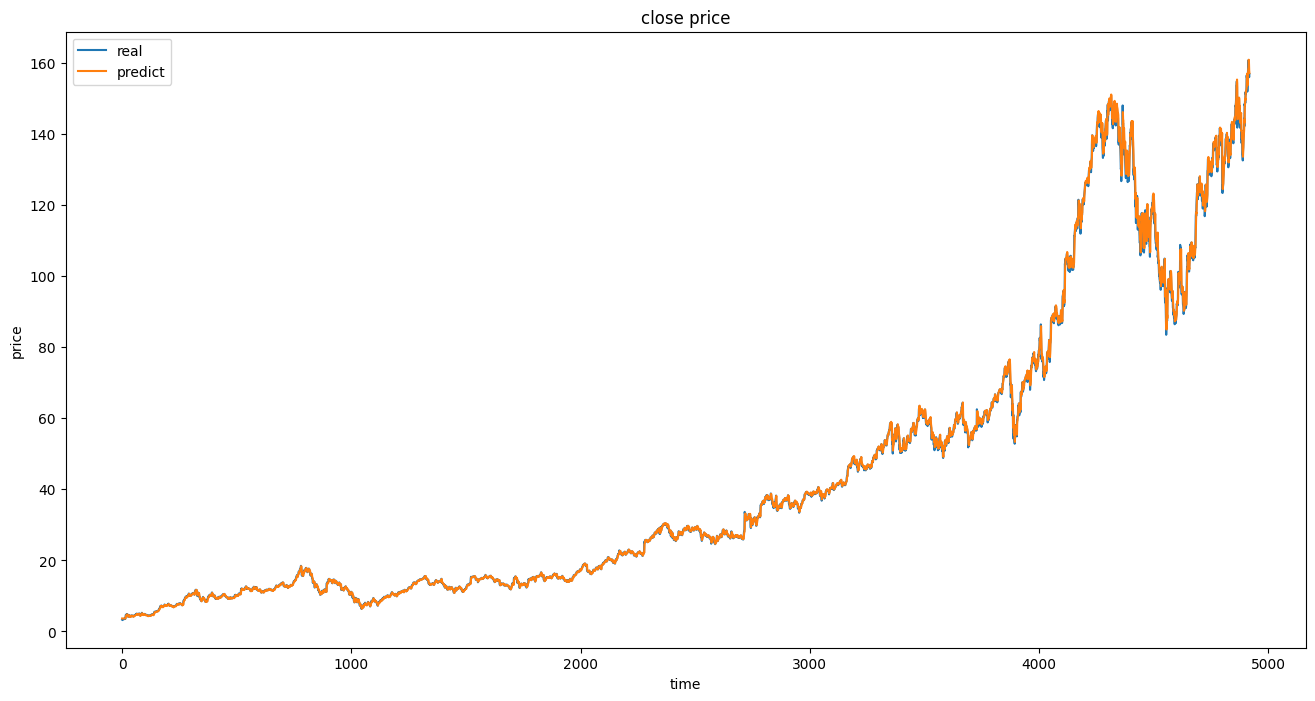

In [100]:
plt.figure(figsize=(16,8))
plt.plot(y_train,label='real')
plt.plot(y_train_predict,label='predict')
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [101]:
y_train.shape,y_train_predict[:,0].shape

((4919,), (4919,))

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
mae = mean_absolute_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)
corr_coef = np.corrcoef(y_train, y_train_predict[:,0])[0][1]
print('RMSE:', rmse)
print('MAE:', mae)
print('R2:', r2)
print('Correlation coefficient:', corr_coef)

RMSE: 1.146812400839957
MAE: 0.5871625723397196
R2: 0.9992064918679456
Correlation coefficient: 0.9996198032287581


In [103]:
data_test = pd.read_csv('E:\毕业论文\数据\TSLA.csv')
price_test = data_test.loc[:,'Adj Close']
price_test_norm = price_test/max(close)
x_test_norm, y_test_norm = extract_data(price_test_norm,time_step)
print(x_test_norm.shape,len(y_test_norm))

(3444, 30, 1) 3444


In [104]:
y_test_predict = model.predict(x_test_norm)*max(close)
y_test = y_test_norm * max(close)

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


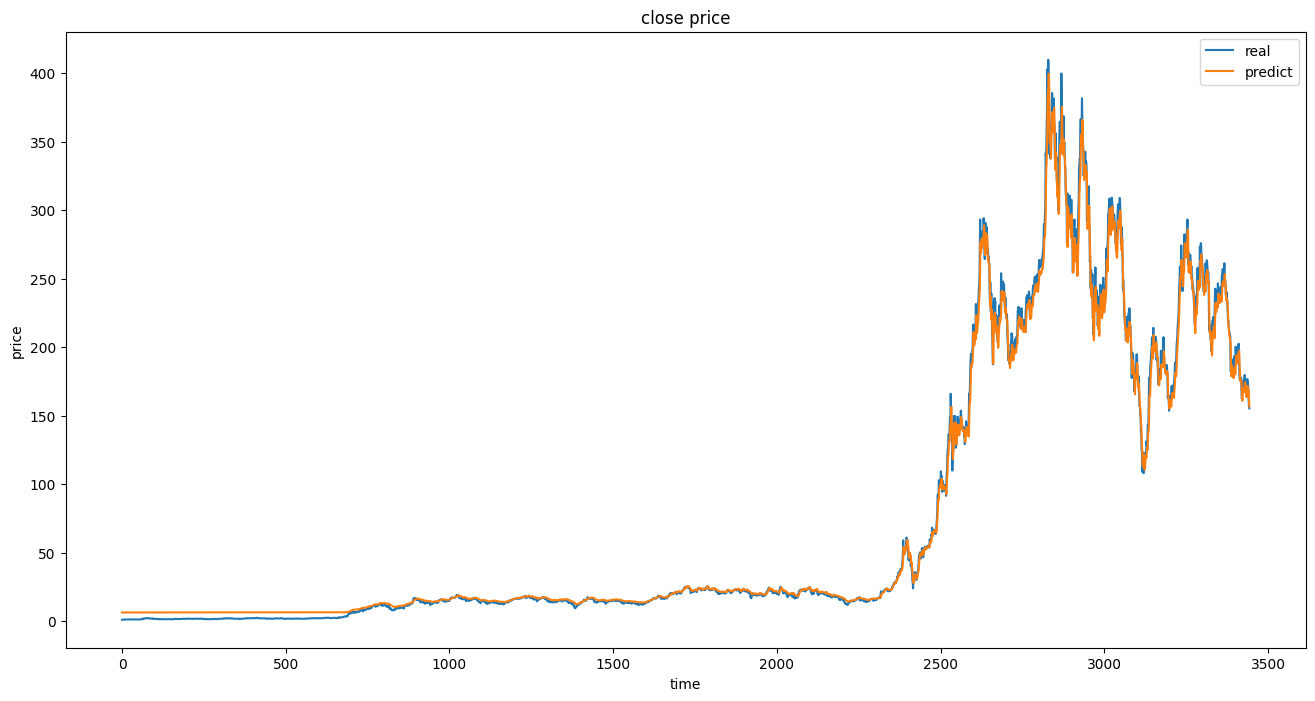

In [105]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label='real')
plt.plot(y_test_predict,label='predict')
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()